# Part 1 Data Extraction and Exploratory Data Analysis
##
## Technologies: Matplotlib, Seaborn, Numpy, Pandas


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/91897/Desktop/data/MTA_Subway_Hourly_13M.csv')
# extract the data

C:\Users\91897\AppData\Local\Temp\ipykernel_16764\1115278395.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/91897/Desktop/data/MTA_Subway_Hourly_13M.csv')


In [5]:
df.columns
#listing the column names

Index(['c_a', 'unit', 'scp', 'station', 'line_name', 'division', 'date',
       'time', 'description', 'entries', 'exits'],
      dtype='object')

In [6]:
df.head()

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,03:00:00,REGULAR,7511448,2558786
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,07:00:00,REGULAR,7511451,2558789
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,11:00:00,REGULAR,7511461,2558813
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,15:00:00,REGULAR,7511495,2558831
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,19:00:00,REGULAR,7511620,2558857


In [7]:
df.info()
#data and column description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000000 entries, 0 to 12999999
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   c_a          object
 1   unit         object
 2   scp          object
 3   station      object
 4   line_name    object
 5   division     object
 6   date         object
 7   time         object
 8   description  object
 9   entries      int64 
 10  exits        int64 
dtypes: int64(2), object(9)
memory usage: 1.1+ GB


In [8]:
df.shape
#overall length of the data which is 13 million records

(13000000, 11)

In [9]:
df

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,03:00:00,REGULAR,7511448,2558786
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,07:00:00,REGULAR,7511451,2558789
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,11:00:00,REGULAR,7511461,2558813
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,15:00:00,REGULAR,7511495,2558831
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01T00:00:00.000,19:00:00,REGULAR,7511620,2558857
...,...,...,...,...,...,...,...,...,...,...,...
12999995,R147,R033,04-05-00,TIMES SQ-42 ST,1237ACENQRS,IRT,2020-06-30T00:00:00.000,08:00:00,REGULAR,17840571,1330323563
12999996,R147,R033,04-05-00,TIMES SQ-42 ST,1237ACENQRS,IRT,2020-06-30T00:00:00.000,08:00:00,REGULAR,17840571,1330323563
12999997,R147,R033,04-05-00,TIMES SQ-42 ST,1237ACENQRS,IRT,2020-06-30T00:00:00.000,12:00:00,REGULAR,17840572,1330323563
12999998,R147,R033,04-05-00,TIMES SQ-42 ST,1237ACENQRS,IRT,2020-06-30T00:00:00.000,12:00:00,REGULAR,17840572,1330323563


In [10]:
df.describe()

,entries,exits
count,1.300000e+07,1.300000e+07
mean,4.200245e+07,3.455366e+07
std,2.160000e+08,1.968724e+08
min,0.000000e+00,0.000000e+00
25%,2.856910e+05,1.311980e+05
50%,1.806426e+06,1.067718e+06
75%,6.460343e+06,4.394607e+06
max,2.128896e+09,2.123502e+09


### Check for Missing/NULL Values and Clean the Data:

In [11]:
df.isnull().sum()

c_a            0
unit           0
scp            0
station        0
line_name      0
division       0
date           0
time           0
description    0
entries        0
exits          0
dtype: int64

In [12]:
df = df.dropna()

### Combining few Columns and adding them to the data for performing Analysis:

In [13]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'
df["turnstile"] = df["c_a"] + "-" + df["unit"]+"-"+ df["scp"]

In [14]:
df['date'] = df['date'].astype(str).str.slice(0, 10)   # keep only 'YYYY-MM-DD'
df['time'] = df['time'].astype(str)                    # ensure time is string



In [15]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')


In [16]:
df["nameofday"]= df["datetime"].dt.day_name()

In [17]:
df.head()

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,turnstile,datetime,nameofday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01,03:00:00,REGULAR,7511448,2558786,A002-R051-02-00-00,2021-01-01 03:00:00,Friday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01,07:00:00,REGULAR,7511451,2558789,A002-R051-02-00-00,2021-01-01 07:00:00,Friday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01,11:00:00,REGULAR,7511461,2558813,A002-R051-02-00-00,2021-01-01 11:00:00,Friday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01,15:00:00,REGULAR,7511495,2558831,A002-R051-02-00-00,2021-01-01 15:00:00,Friday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-01-01,19:00:00,REGULAR,7511620,2558857,A002-R051-02-00-00,2021-01-01 19:00:00,Friday


In [18]:
df.duplicated().sum()

np.int64(2641661)

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df.columns = df.columns.str.replace(" ", "")

In [21]:
df = df[["station","turnstile","date","time","datetime","nameofday","entries","exits"]]

In [22]:
df.head()

,station,turnstile,date,time,datetime,nameofday,entries,exits
0,59 ST,A002-R051-02-00-00,2021-01-01,03:00:00,2021-01-01 03:00:00,Friday,7511448,2558786
1,59 ST,A002-R051-02-00-00,2021-01-01,07:00:00,2021-01-01 07:00:00,Friday,7511451,2558789
2,59 ST,A002-R051-02-00-00,2021-01-01,11:00:00,2021-01-01 11:00:00,Friday,7511461,2558813
3,59 ST,A002-R051-02-00-00,2021-01-01,15:00:00,2021-01-01 15:00:00,Friday,7511495,2558831
4,59 ST,A002-R051-02-00-00,2021-01-01,19:00:00,2021-01-01 19:00:00,Friday,7511620,2558857


In [23]:
len(df["station"].unique())
# Overall Number of stations in the Data

366

In [24]:
df["station"].unique()
#Printing all the stations present in NYC as per the data

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', '50 ST', '59 ST COLUMBUS',
       '66 ST-LINCOLN', '72 ST', '79 ST', '86 ST', '96 ST', '103 ST',
       'CATHEDRAL PKWY', '116 ST-COLUMBIA', '125 ST', '137 ST CITY COL',
       '145 ST', '157 ST', '168 ST', '181 ST', '191 ST', 'DYCKMAN ST',
       '207 ST', '215 ST', 'MARBLE HILL-225', '231 ST', '238 ST',
       'V.CORTLANDT PK', 'BOWLING GREEN', 'WALL ST', 'BROOKLYN BRIDGE',
       'SPRING ST', 'BLEECKER ST', 'ASTOR PL', '33 ST', 'GRD CNTRL-42 ST',
       '51 ST', '68ST-HUNTER CO', '77 ST', '110 ST', '116 ST',
       '138/GR

In [25]:
df.sort_values(['turnstile','datetime'], ascending= (True,True) , inplace=True)

In [26]:
FOUR_HOUR_ENTRIES = df.entries - df.entries.shift(1)

In [27]:
df['FOUR_HOUR_ENTRIES'] = FOUR_HOUR_ENTRIES.fillna(0)

In [28]:
FOUR_HOUR_EXITS = df.exits - df.exits.shift(1)

In [29]:
df['FOUR_HOUR_EXITS'] = FOUR_HOUR_EXITS.fillna(0)

In [30]:
FOOT_TRAFFIC = df.FOUR_HOUR_ENTRIES + df.FOUR_HOUR_EXITS
df['FOOT_TRAFFIC'] = FOOT_TRAFFIC

In [31]:
df.head(10)

,station,turnstile,date,time,datetime,nameofday,entries,exits,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC
2696,59 ST,A002-R051-02-00-00,2019-12-28,03:00:00,2019-12-28 03:00:00,Saturday,7324295,2482512,0.0,0.0,0.0
2697,59 ST,A002-R051-02-00-00,2019-12-28,07:00:00,2019-12-28 07:00:00,Saturday,7324305,2482523,10.0,11.0,21.0
2698,59 ST,A002-R051-02-00-00,2019-12-28,11:00:00,2019-12-28 11:00:00,Saturday,7324371,2482594,66.0,71.0,137.0
2699,59 ST,A002-R051-02-00-00,2019-12-28,15:00:00,2019-12-28 15:00:00,Saturday,7324587,2482647,216.0,53.0,269.0
2700,59 ST,A002-R051-02-00-00,2019-12-28,19:00:00,2019-12-28 19:00:00,Saturday,7324963,2482713,376.0,66.0,442.0
2701,59 ST,A002-R051-02-00-00,2019-12-28,23:00:00,2019-12-28 23:00:00,Saturday,7325143,2482753,180.0,40.0,220.0
2690,59 ST,A002-R051-02-00-00,2019-12-29,03:00:00,2019-12-29 03:00:00,Sunday,7325192,2482766,49.0,13.0,62.0
2691,59 ST,A002-R051-02-00-00,2019-12-29,07:00:00,2019-12-29 07:00:00,Sunday,7325201,2482771,9.0,5.0,14.0
2692,59 ST,A002-R051-02-00-00,2019-12-29,11:00:00,2019-12-29 11:00:00,Sunday,7325249,2482823,48.0,52.0,100.0
2693,59 ST,A002-R051-02-00-00,2019-12-29,15:00:00,2019-12-29 15:00:00,Sunday,7325421,2482873,172.0,50.0,222.0


In [32]:
df = df.loc[(df['FOUR_HOUR_ENTRIES']>0) & (df['FOUR_HOUR_EXITS']>0),]

In [33]:
df.FOUR_HOUR_ENTRIES.max()

2120212023.0

In [34]:
df.FOUR_HOUR_ENTRIES.min()

1.0

In [35]:
df.FOUR_HOUR_EXITS.max()

2123286922.0

In [36]:
df.FOUR_HOUR_EXITS.min()

1.0

In [37]:
df.FOOT_TRAFFIC.min()

2.0

In [38]:
#excluding values above 10000
df['FOUR_HOUR_ENTRIES'] = df.groupby(['turnstile']).FOUR_HOUR_ENTRIES.transform(
        lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

In [39]:
# clean 'HOURLY_EXITS'
df['FOUR_HOUR_EXITS'] = df.groupby(['turnstile']).FOUR_HOUR_EXITS.transform(
        lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

C:\Users\91897\AppData\Local\Temp\ipykernel_16764\1706404506.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sum", y="station", orient="h", data=graph1DF, palette="cubehelix")


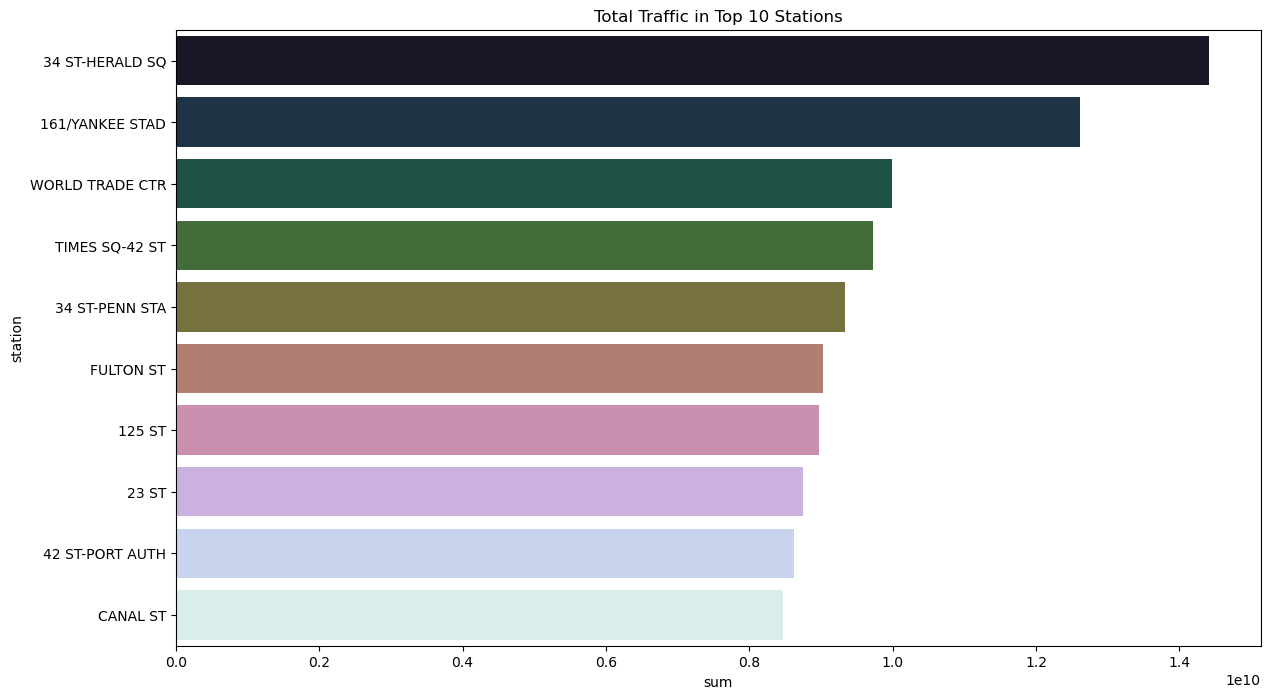

In [73]:
plt.figure(figsize=(14, 8))
plt.title("Total Traffic in Top 10 Stations")
graph1DF = df.groupby(['station']).FOOT_TRAFFIC.agg(['sum']).reset_index()
graph1DF = graph1DF.nlargest(10,'sum')
sns.barplot(x="sum", y="station", orient="h", data=graph1DF, palette="cubehelix")
plt.savefig('10TopStations.png', dpi = 1000)
plt.show('10TopStations.png')

C:\Users\91897\AppData\Local\Temp\ipykernel_16764\1935279441.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="FOUR_HOUR_ENTRIES", y="station", orient="h", data=entriesTop10St, errorbar=None, palette="mako")


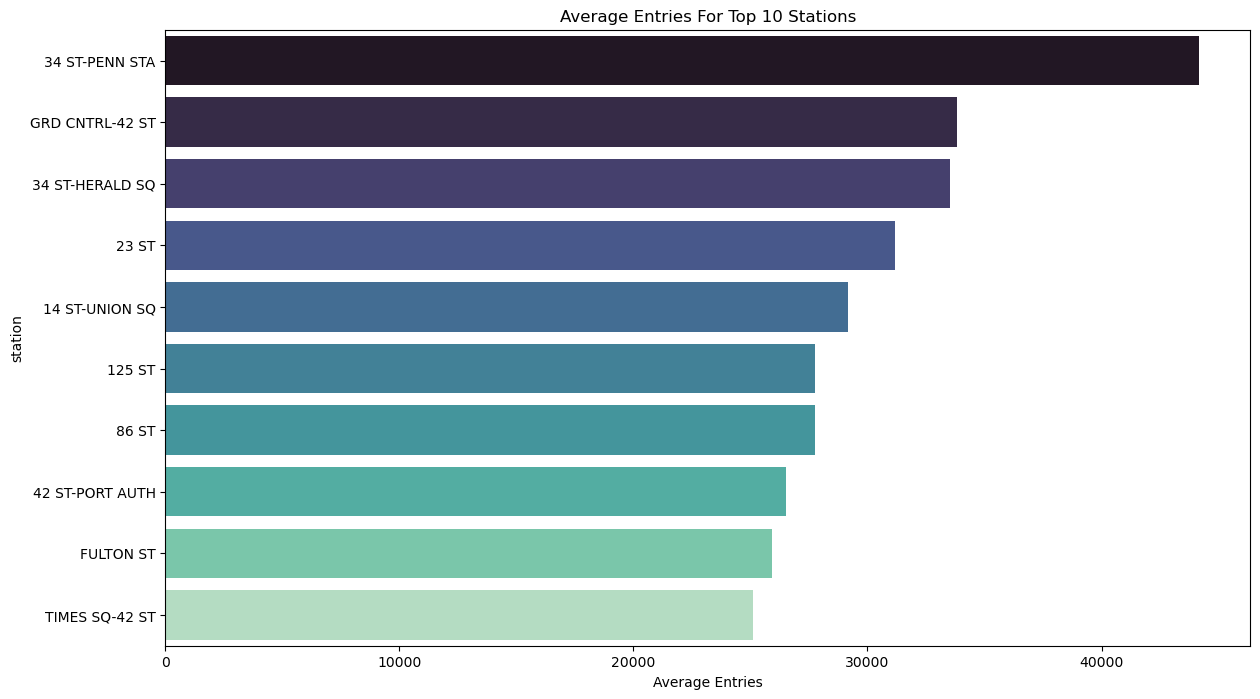

In [74]:
#Avg Entries For Top 10 Stations
entriesByStDt = df.groupby(['station','date','nameofday']).FOUR_HOUR_ENTRIES.sum().reset_index()

top10St = entriesByStDt.groupby('station').FOUR_HOUR_ENTRIES.sum().reset_index().nlargest(10,'FOUR_HOUR_ENTRIES')[['station']]

entriesTop10St = top10St.merge(entriesByStDt, on='station')

plt.figure(figsize=(14, 8))
plt.title("Average Entries For Top 10 Stations")
ax = sns.barplot(x="FOUR_HOUR_ENTRIES", y="station", orient="h", data=entriesTop10St, errorbar=None, palette="mako")

ax.set(xlabel='Average Entries', ylabel='station')

plt.savefig('AverageEntriesForTop10Stations.png', dpi=1000)
plt.show('AverageEntriesForTop10Stations.png')

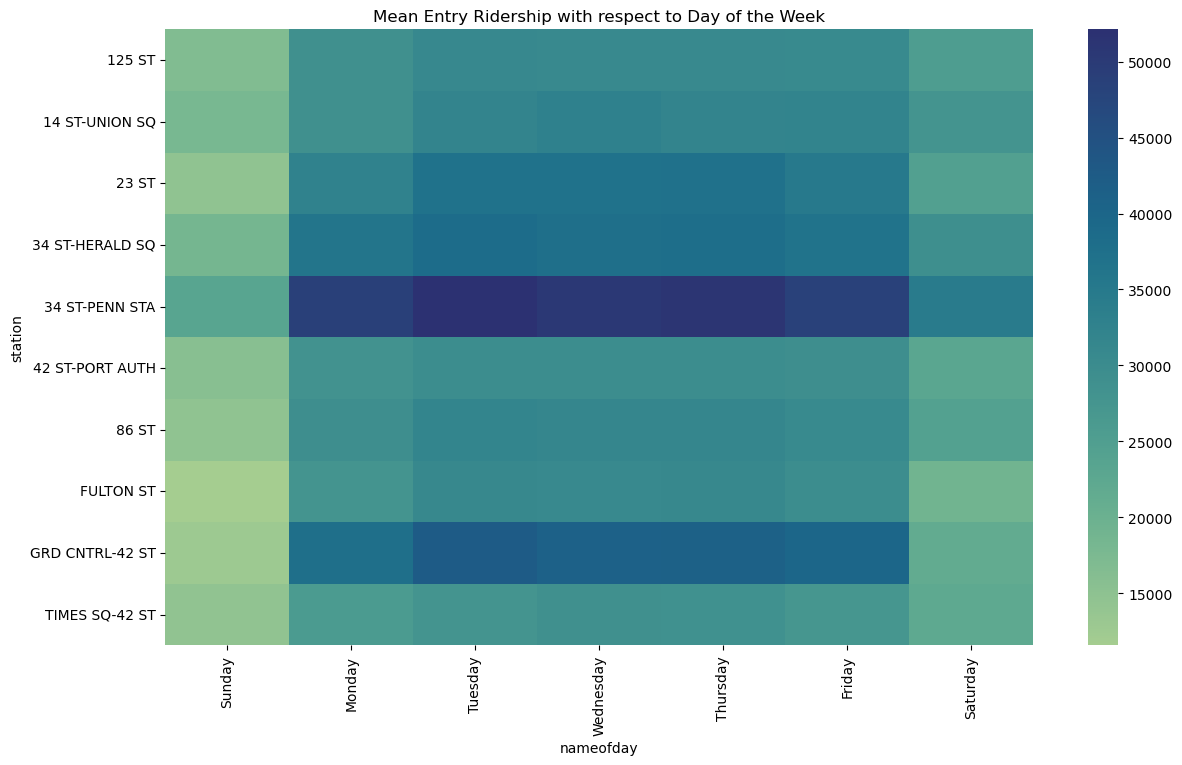

In [76]:
top10 = list(df.groupby(['station']).FOUR_HOUR_ENTRIES.agg(['sum']).sort_values('sum', ascending=False).head(10).index)
tDF = df.groupby(['station', 'date','nameofday']).FOUR_HOUR_ENTRIES.agg("sum").reset_index()

tDF2 = tDF[tDF.station.isin(top10)]
tDF3 = tDF2.groupby(["station", "nameofday"]).FOUR_HOUR_ENTRIES.mean().reset_index()
tDF4 = tDF3.pivot(index="station", columns="nameofday", values="FOUR_HOUR_ENTRIES")
tDF4 = tDF4[["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]]

# Now plotting
plt.figure(figsize=(14,8))
sns.heatmap(tDF4, cmap="crest")
plt.xticks(rotation="vertical")
plt.title("Mean Entry Ridership with respect to Day of the Week")
plt.savefig("MeanEntriesbyDay.png", dpi=1000)
plt.show()


In [43]:
df["year"] = df.datetime.dt.year

In [44]:
df['month'] = df.datetime.dt.month_name()

In [45]:
df["day"] = df.datetime.dt.day_name()

In [46]:
year = df.groupby("year").agg({"FOUR_HOUR_ENTRIES":"mean","FOUR_HOUR_EXITS":"mean"}).reset_index().sort_values(['year'],ascending=[False])
year.sort_values(['year'], ascending= (True) , inplace=True)
year.head(7)

,year,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS
0,2019,153.904450,130.694979
1,2020,82.258290,74.827055
2,2021,26.899817,31.591232


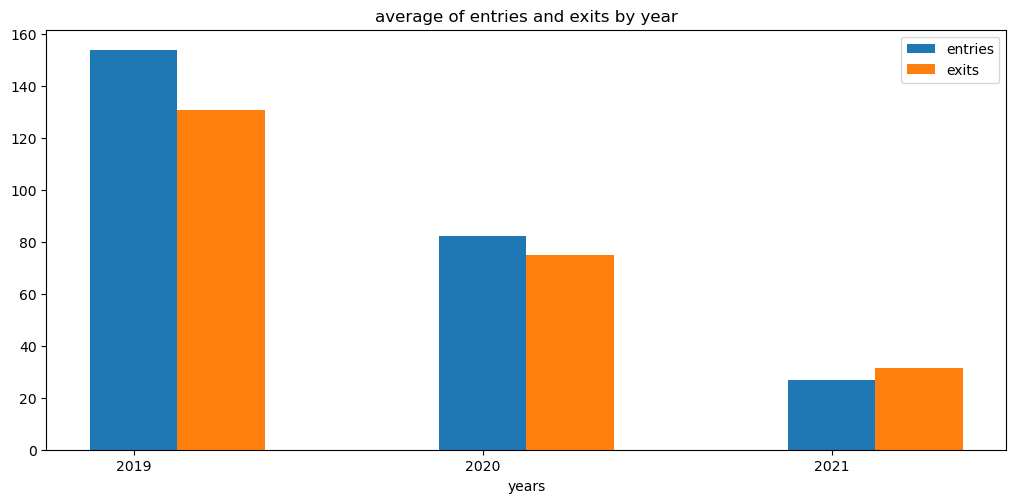

In [77]:
fig = plt.figure(figsize=[12,7])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
years = list(year.year)
indeks = np.arange(len(years))
a = 0.25
entries = list(year.FOUR_HOUR_ENTRIES)
exits = list(year.FOUR_HOUR_EXITS)
chart.bar(indeks, entries, width=a, label="entries", color="#1f77b4")  # Vibrant Blue
chart.bar(indeks + a, exits, width=a, label="exits", color="#ff7f0e")  # Bright Orange
chart.set_title("average of entries and exits by year")
chart.set_xlabel("years")
chart.set_xticks(ticks = indeks)
chart.set_xticklabels(labels=years)
chart.legend()
plt.show()
fig.savefig("MeanEntriesbyyear.png")

In [80]:
month = df.groupby("month").agg({"FOUR_HOUR_ENTRIES":"mean","FOUR_HOUR_EXITS":"mean"}).reset_index().sort_values(['FOUR_HOUR_ENTRIES'],ascending=[False])
month.head(12)

,month,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS
3,February,192.065086,156.694408
4,January,187.123344,152.318349
7,March,105.039751,88.747318
10,October,81.490557,80.475907
2,December,69.607348,68.468886
1,August,66.917839,68.802796
11,September,63.673060,63.565901
9,November,60.795497,61.479912
5,July,48.598524,49.882074
6,June,38.870852,39.823104


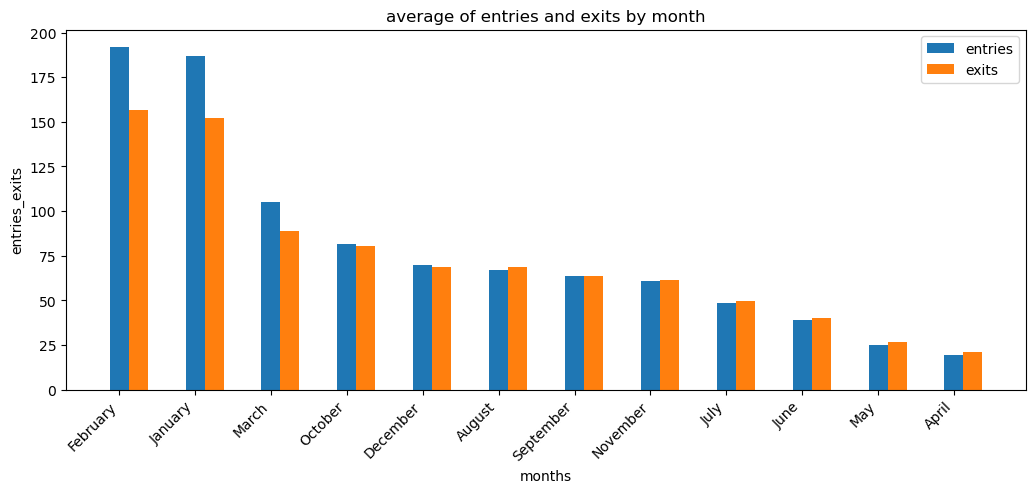

In [84]:
fig = plt.figure(figsize=[12,6])
chart = fig.add_axes([0.1,0.1,0.8,0.6])
months = list(month.month)
indeks = np.arange(len(months))
a = 0.25
entries_month = list(month.FOUR_HOUR_ENTRIES)
exits_month = list(month.FOUR_HOUR_EXITS)
chart.bar(indeks, entries_month, width=a, label="entries", color="#1f77b4")  # Blue
chart.bar(indeks+a, exits_month, width=a, label="exits", color="#ff7f0e")    # Orange
plt.xticks(rotation=45, ha='right')
chart.set_title("average of entries and exits by month")
chart.set_xlabel("months")
chart.set_ylabel("entries_exits")
chart.set_xticks(ticks = indeks)
chart.set_xticklabels(labels=months)
chart.legend()
plt.show()
fig.savefig("MeanEntriesbymonth.png")

In [50]:
month = df.groupby("day").agg({"FOUR_HOUR_ENTRIES":"mean","FOUR_HOUR_EXITS":"mean"}).reset_index().sort_values(['FOUR_HOUR_ENTRIES'],ascending=[False])
month.head(7)

,day,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS
5,Tuesday,93.491443,83.061695
4,Thursday,92.798035,82.374657
6,Wednesday,92.566551,82.494002
0,Friday,90.154327,80.809133
1,Monday,87.307094,77.960197
2,Saturday,74.276439,72.119863
3,Sunday,47.067371,46.518924


In [51]:
df['WEEKYEAR'] = df.datetime.dt.isocalendar().week

In [52]:
df['WEEKDAY'] = df.datetime.dt.weekday

In [53]:
def weeklygraph(mask, station):

    mta_year = df[mask].groupby(['station','WEEKYEAR', 'WEEKDAY'],as_index=False)[['FOUR_HOUR_ENTRIES']].first()

    for i in mta_year.WEEKYEAR.unique():
        mask = mta_year.WEEKYEAR == i

        plt.title("Entries by Week - {}".format(station))

        #color and label the season
        #blue - winter, orange - fall
        seasons_c = ['blue', 'blue', 'pink', 'pink', 'pink', 'red', 'red', 'red', 'orange', 'orange', 'orange', 'blue']

        if i <= 8:
            color = 'blue'
            leg = 'winter'
        elif i <= 20:
            leg = 'spring'
            color = 'pink'
        elif i <= 32:
            color = 'red'
            leg = 'summer'
        else:
            color = 'orange'
            leg = 'fall'

        patch1 = mpatches.Patch(color='red', label='Summer')
        patch2 = mpatches.Patch(color='orange', label='Fall')
        patch3 = mpatches.Patch(color='pink', label='Spring')
        patch4 = mpatches.Patch(color='blue', label='Winter')


        plt.plot(mta_year[mask].WEEKDAY, mta_year[mask].FOUR_HOUR_ENTRIES, color=color, alpha=0.5, label=leg)

        plt.xticks(ticks = range(7), labels=['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        plt.xlabel("Day of Week")
       # plt.ylabel("Entries");
        plt.legend(handles=[patch1, patch2, patch3, patch4])


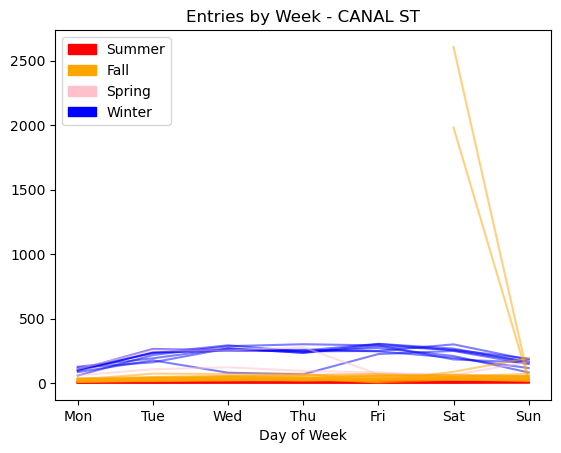

In [54]:
import matplotlib.patches as mpatches
mask = (df.station == 'CANAL ST')

weeklygraph(mask, 'CANAL ST')
plt.savefig('weeklygraph-67th.png')
plt.show()

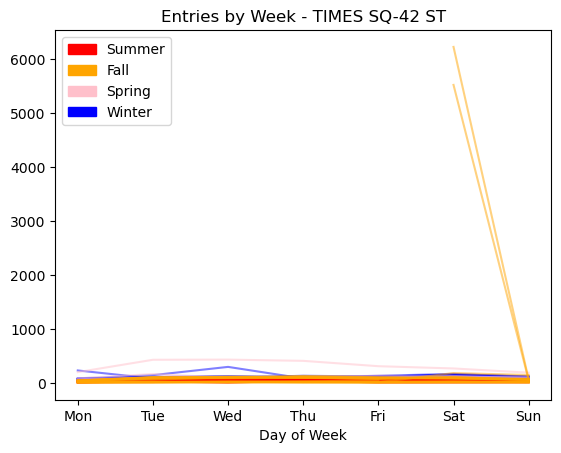

In [55]:
mask = (df.station == 'TIMES SQ-42 ST')

weeklygraph(mask, 'TIMES SQ-42 ST')
plt.savefig('weeklygraph-timesquare.png')
plt.show()

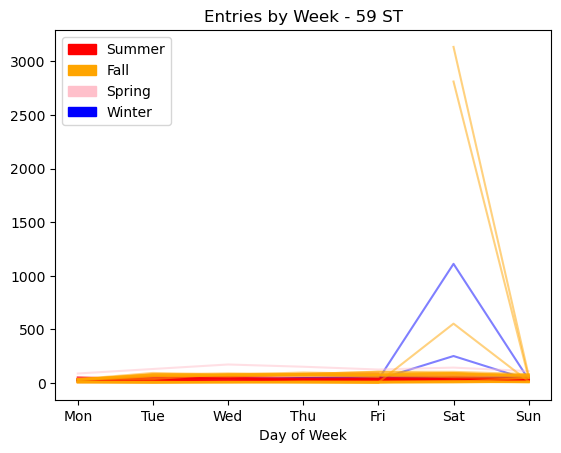

In [56]:
mask = (df.station == '59 ST')

weeklygraph(mask, '59 ST')
plt.savefig('weeklygraph-59st.png')
plt.show()

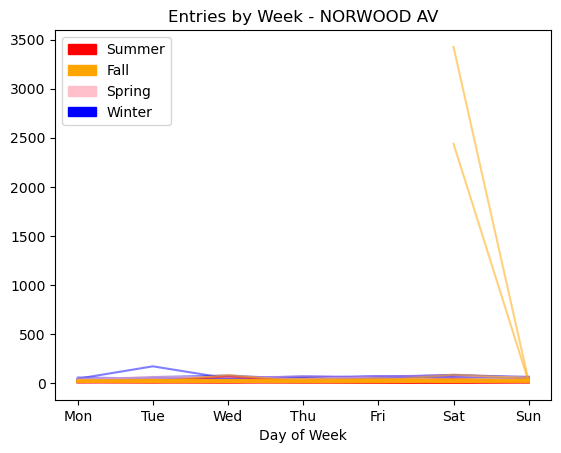

In [57]:
mask = (df.station == 'NORWOOD AV')

weeklygraph(mask, 'NORWOOD AV')
plt.savefig('weeklygraphNORWOODAV.png')
plt.show()

In [57]:
holidays = {"01/01/2020" : "New Years",
            "01/20/2020" : "MLK Day",
            "02/12/2020" : "Lincolns Bday",
            "09/07/2020" : "Labor Day",
            "10/12/2020" : "Columbus Day",
            "11/11/2020" : "Veterans Day",
            "11/26/2020" : "Thanksgiving",
            "12/25/2020" : "Christmas Day",
            "01/01/2021" : "New Years Day",
            "01/18/2021" : "MLK Day",
            "02/12/2021" : "Lincolns Bday",
            "02/15/2021" : "Washingtons Bday"}

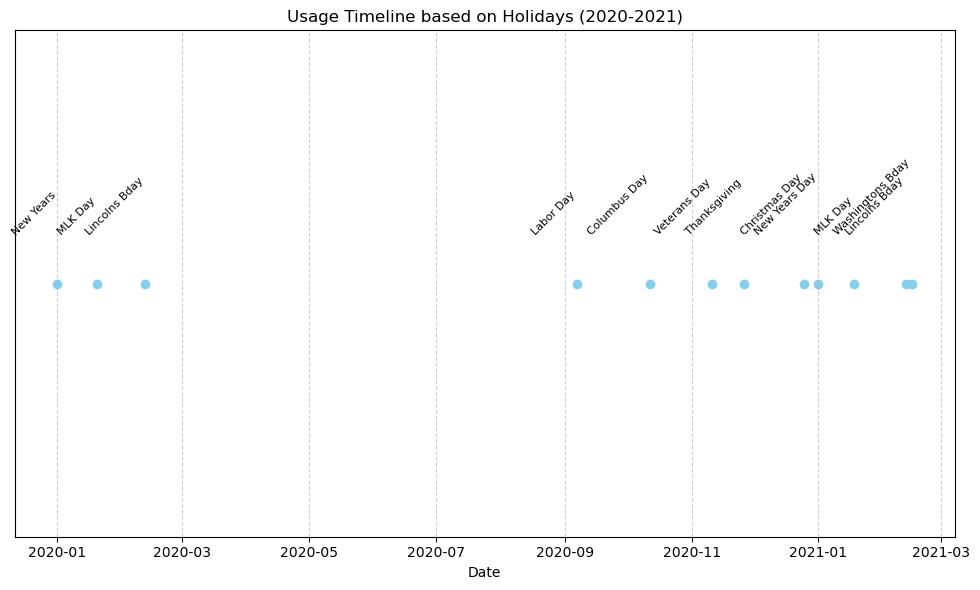

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Holiday dictionary
holidays = {
    "01/01/2020": "New Years",
    "01/20/2020": "MLK Day",
    "02/12/2020": "Lincolns Bday",
    "09/07/2020": "Labor Day",
    "10/12/2020": "Columbus Day",
    "11/11/2020": "Veterans Day",
    "11/26/2020": "Thanksgiving",
    "12/25/2020": "Christmas Day",
    "01/01/2021": "New Years Day",
    "01/18/2021": "MLK Day",
    "02/12/2021": "Lincolns Bday",
    "02/15/2021": "Washingtons Bday"
}

# Convert to DataFrame
holiday_df = pd.DataFrame(list(holidays.items()), columns=['Date', 'Holiday'])
holiday_df['Date'] = pd.to_datetime(holiday_df['Date'])

# Sort by date
holiday_df.sort_values(by='Date', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(holiday_df['Date'], [1]*len(holiday_df), marker='o', color='skyblue')
for i, row in holiday_df.iterrows():
    plt.text(row['Date'], 1.01, row['Holiday'], rotation=45, ha='right', va='bottom', fontsize=8)

plt.yticks([])
plt.title('Usage Timeline based on Holidays (2020-2021)')
plt.xlabel('Date')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()


In [91]:
holidays = {"01/01" : "New Years",
            "01/20" : "MLK Day",
            "02/12" : "Lincolns Bday",
            "09/07" : "Labor Day",
            "10/12" : "Columbus Day",
            "11/11" : "Veterans Day",
            "11/26" : "Thanksgiving",
            "12/25" : "Christmas Day"}

df['HOLIDAY'] = pd.to_datetime(df['date']).dt.strftime('%m/%d').map(holidays)

In [92]:
df.HOLIDAY.fillna("", inplace=True)

C:\Users\91897\AppData\Local\Temp\ipykernel_16764\2440261152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.HOLIDAY.fillna("", inplace=True)


In [93]:
df['HOLIDAY'].dtype

dtype('O')

In [94]:
df.sort_values('FOUR_HOUR_ENTRIES', ascending=False, inplace=True)
df['rank'] = df.FOUR_HOUR_ENTRIES.rank()

In [95]:
holidaydf = (df
 .groupby(['HOLIDAY'])['FOUR_HOUR_ENTRIES'].mean()
 .reset_index())

holidaydf.rename(columns = {"FOUR_HOUR_ENTRIES" : "AVG_DAILY_ENTRIES", 
                            "HOLIDAY":"FEDERAL HOLIDAY"},
                 inplace=True)
holidaydf.loc[holidaydf["FEDERAL HOLIDAY"] == "", "FEDERAL HOLIDAY"] = "**REGULAR**"

holidaydf.sort_values(["AVG_DAILY_ENTRIES"], inplace=True)

In [96]:
nonholi = (
    df.groupby(['WEEKDAY'])['FOUR_HOUR_ENTRIES'].mean()
      .reset_index()
)

# Filter weekdays (Monday=0 to Friday=4)
weekdays = [0, 1, 2, 3, 4]
nonholi = nonholi[nonholi['WEEKDAY'].isin(weekdays)]

# Calculate the mean of the 'FOUR_HOUR_ENTRIES' column
nonholi_mean = nonholi['FOUR_HOUR_ENTRIES'].mean()
new_row = pd.DataFrame([{
    'FEDERAL HOLIDAY': 'Non-Holiday',
    'FOUR_HOUR_ENTRIES': nonholi_mean
}])

# Append using concat
nonholi = pd.concat([nonholi, new_row], ignore_index=True)
nonholi

,WEEKDAY,FOUR_HOUR_ENTRIES,FEDERAL HOLIDAY
0,0.0,87.307094,NaN
1,1.0,93.491443,NaN
2,2.0,92.566551,NaN
3,3.0,92.798035,NaN
4,4.0,90.154327,NaN
5,NaN,91.263490,Non-Holiday


In [97]:
new_row = pd.DataFrame([{
    'FEDERAL HOLIDAY': 'Non-Holiday',
    'AVG_DAILY_ENTRIES': nonholi_mean
}])

holidaydf = pd.concat([holidaydf, new_row], ignore_index=True)

In [98]:
holidaydf.sort_values(["AVG_DAILY_ENTRIES"], inplace=True)
holidaydf

,FEDERAL HOLIDAY,AVG_DAILY_ENTRIES
0,Christmas Day,22.246945
1,Thanksgiving,28.919029
2,Labor Day,40.919593
3,Columbus Day,55.882123
4,New Years,66.250348
5,Veterans Day,66.511697
6,**REGULAR**,82.980504
9,Non-Holiday,91.263490
7,MLK Day,136.200471
8,Lincolns Bday,231.344593


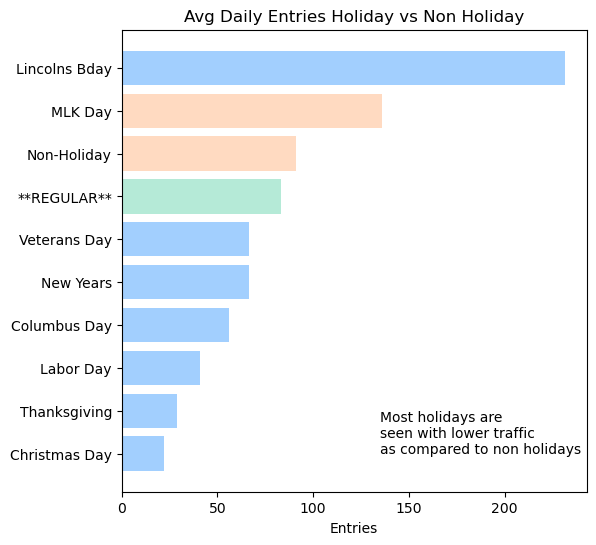

In [124]:
plt.figure(figsize=(6,6))
plt.title("Avg Daily Entries Holiday vs Non Holiday")
plt.xlabel("Entries")
colors = ['#A2CFFE'] * 6 + ['#B5EAD7'] + ['#FFDAC1'] * 2 
plt.annotate("Most holidays are \nseen with lower traffic \nas compared to non holidays", (135,0))
plt.barh(holidaydf["FEDERAL HOLIDAY"], holidaydf.AVG_DAILY_ENTRIES, color = colors)
plt.savefig('holidayimpact.png')

In [102]:
df_timeline = df.copy()

In [103]:
df_timeline.head()

,station,turnstile,date,time,datetime,nameofday,entries,exits,FOUR_HOUR_ENTRIES,FOUR_HOUR_EXITS,FOOT_TRAFFIC,year,month,day,WEEKYEAR,WEEKDAY,HOLIDAY,rank
12457079,WTC-CORTLANDT,R108A-R305-05-03-00,2019-12-28,00:00:00,2019-12-28 00:00:00,Saturday,52528,492956,9989.0,24.974178,239847.0,2019,December,Saturday,52,5,,7740986.0
10603685,GRAND ST,N520-R240-00-00-00,2020-10-03,00:00:00,2020-10-03 00:00:00,Saturday,20467966,22312732,9935.0,286.754177,22570.0,2020,October,Saturday,40,5,,7740985.0
2725887,103 ST,R252-R180-00-00-01,2020-10-03,01:00:00,2020-10-03 01:00:00,Saturday,5053503,2162386,9873.0,4259.000000,14132.0,2020,October,Saturday,40,5,,7740984.0
7457918,42 ST-PORT AUTH,N063A-R011-00-00-03,2020-08-15,00:00:00,2020-08-15 00:00:00,Saturday,5086496,2326359,9771.0,7159.000000,16930.0,2020,August,Saturday,33,5,,7740983.0
4284415,111 ST,R530-R310-00-00-00,2020-10-03,00:00:00,2020-10-03 00:00:00,Saturday,17810975,11828299,9766.0,5963.000000,15729.0,2020,October,Saturday,40,5,,7740982.0


In [104]:
df_timeline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7741120 entries, 12457079 to 4936888
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   station            object        
 1   turnstile          object        
 2   date               object        
 3   time               object        
 4   datetime           datetime64[ns]
 5   nameofday          object        
 6   entries            int64         
 7   exits              int64         
 8   FOUR_HOUR_ENTRIES  float64       
 9   FOUR_HOUR_EXITS    float64       
 10  FOOT_TRAFFIC       float64       
 11  year               int32         
 12  month              object        
 13  day                object        
 14  WEEKYEAR           UInt32        
 15  WEEKDAY            int32         
 16  HOLIDAY            object        
 17  rank               float64       
dtypes: UInt32(1), datetime64[ns](1), float64(4), int32(2), int64(2), object(8)
memory usage: 1.0+ GB


### Performing further Analysis on Individual stations. Selected top 10 most populated stations:

In [112]:
df_timeline_5 = df_timeline[(df_timeline["station"]=="34 ST-PENN STA")
                   | (df_timeline["station"]=='GRD CNTRL-42 ST')
                  | (df_timeline["station"]=="86 ST")
                  | (df_timeline["station"]=="34 ST-HERALD SQ")
                  | (df_timeline["station"]=="14 ST-UNION SQ")]

In [113]:
df_timeline['FOUR_HOUR_ENTRIES'] = df_timeline.groupby(['turnstile']).FOUR_HOUR_ENTRIES.transform(lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))
df_timeline['FOUR_HOUR_EXITS'] = df_timeline.groupby(['turnstile']).FOUR_HOUR_EXITS.transform(lambda x: np.where((x<0)|(x>10000),x.mask((x<0)|(x>10000)).mean(),x))

In [114]:
df_timeline_5 = df_timeline_5.groupby(['station','nameofday','time'])['FOOT_TRAFFIC'].sum()

In [115]:
df_timeline_5

station          nameofday  time    
14 ST-UNION SQ   Friday     00:00:00    259895.0
                            01:00:00     87464.0
                            04:00:00     29008.0
                            05:00:00      4323.0
                            05:58:59       195.0
                                          ...   
GRD CNTRL-42 ST  Wednesday  17:00:00    171143.0
                            19:00:00    472489.0
                            20:00:00    743344.0
                            21:00:00    129971.0
                            23:00:00    170943.0
Name: FOOT_TRAFFIC, Length: 865, dtype: float64

In [116]:
df_5=pd.DataFrame(df_timeline_5)

In [117]:
df_5 =df_5.reset_index()

### Analysis on 34 ST-PENN STA as it is part of top 10:

In [118]:
df_34 = df_5[df_5['station'] =='34 ST-PENN STA']

In [119]:
df_34

,station,nameofday,time,FOOT_TRAFFIC
263,34 ST-PENN STA,Friday,00:00:00,102438.0
264,34 ST-PENN STA,Friday,01:00:00,73726.0
265,34 ST-PENN STA,Friday,02:00:00,23356.0
266,34 ST-PENN STA,Friday,03:00:00,53852.0
267,34 ST-PENN STA,Friday,04:00:00,12127.0
...,...,...,...,...
477,34 ST-PENN STA,Wednesday,19:12:21,3.0
478,34 ST-PENN STA,Wednesday,20:00:00,347035.0
479,34 ST-PENN STA,Wednesday,21:00:00,274699.0
480,34 ST-PENN STA,Wednesday,22:00:00,77534.0


In [120]:
df_35 = df_34.groupby(["nameofday","time"])

In [121]:
df_35 = df_35["FOOT_TRAFFIC"].mean().reset_index()

In [122]:
#Creating Pivot table for heatmap

df_35 = df_35.pivot(index="time", columns="nameofday",values="FOOT_TRAFFIC")
df_35 = df_35[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

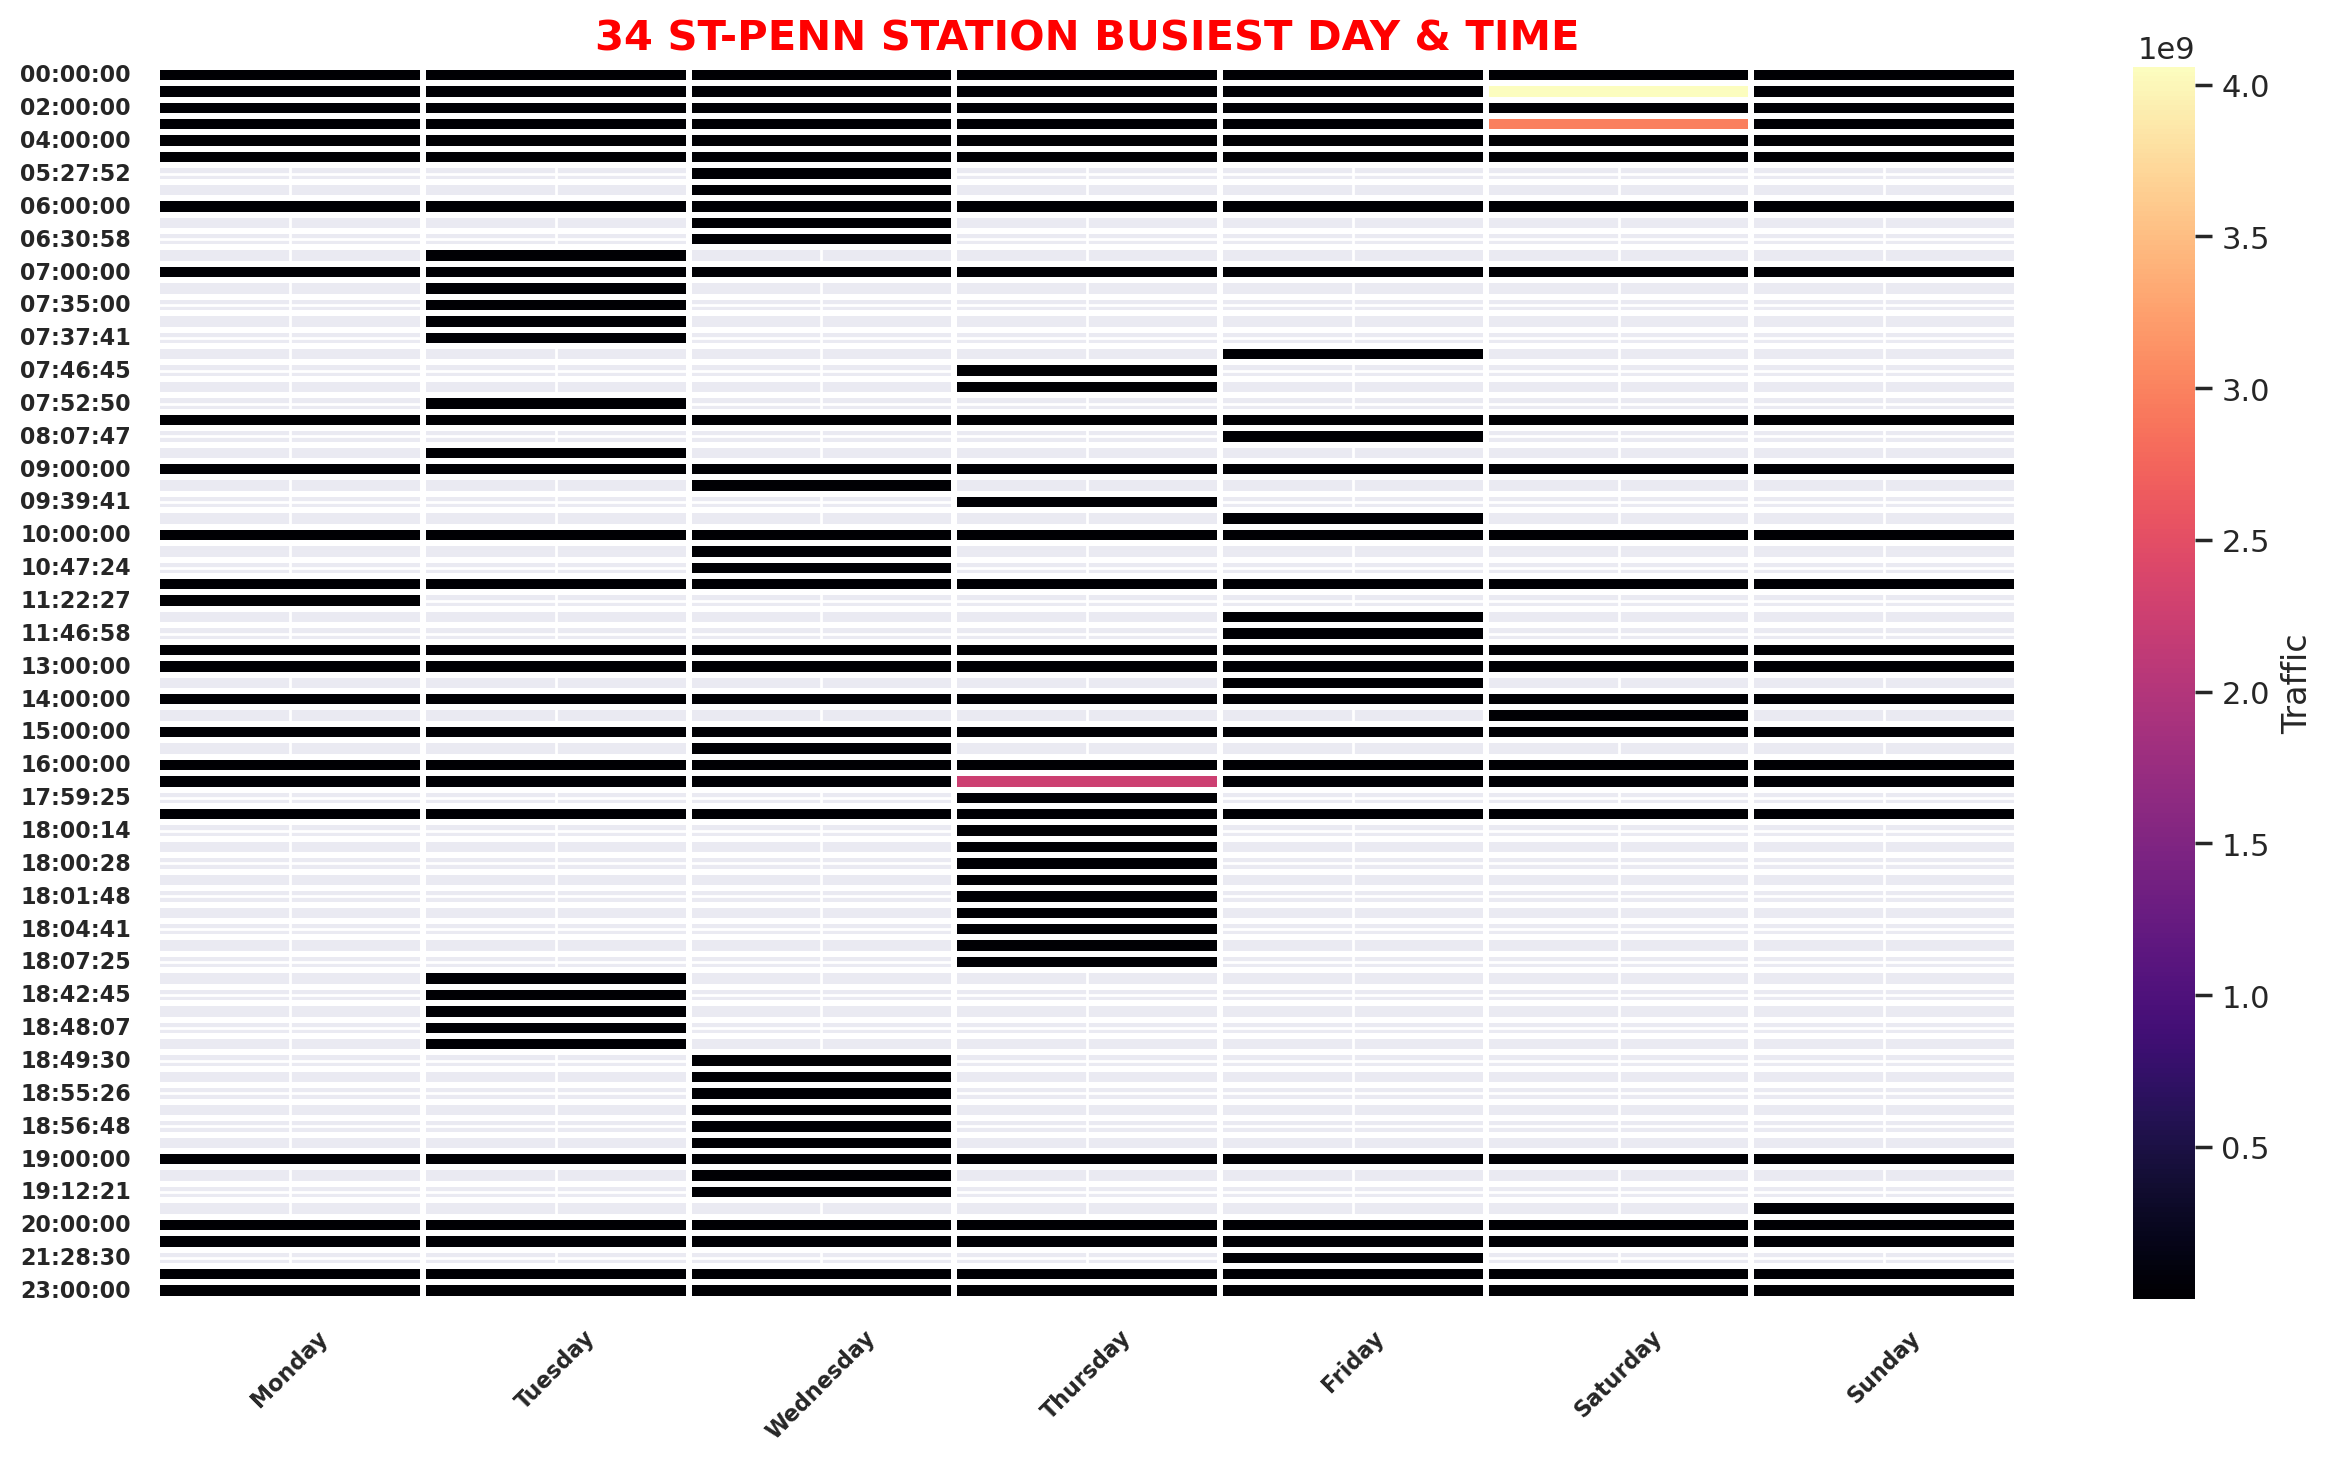

In [123]:
plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(df_35, linewidths=2, cmap="magma", cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=45,size=8)
plt.title("34 ST-PENN STATION BUSIEST DAY & TIME",weight="bold",c="red", fontsize=15)
plt.savefig('34st_data_discre.png', dpi=300)
plt.show()

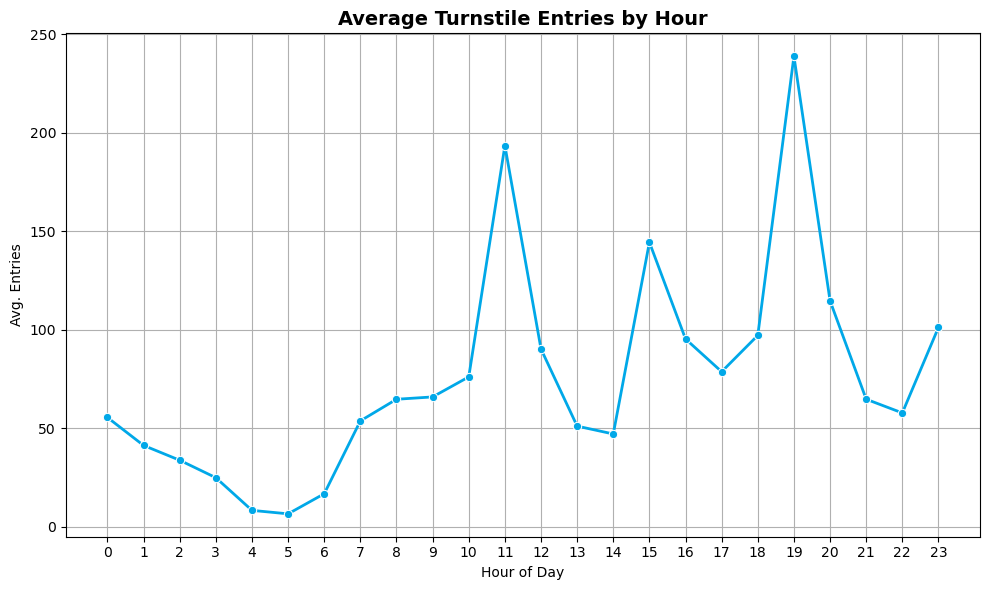

In [125]:
# Convert 'time' column if not already in datetime
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce')
df['hour'] = df['time'].dt.hour

# Group by hour and compute average entries
hourly_trend = df.groupby('hour')['FOUR_HOUR_ENTRIES'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='FOUR_HOUR_ENTRIES', data=hourly_trend, marker='o', linewidth=2, color='#00A8E8')
plt.title("Average Turnstile Entries by Hour", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Avg. Entries")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.savefig("AvgEntriesByHour.png", dpi=300)
plt.show()


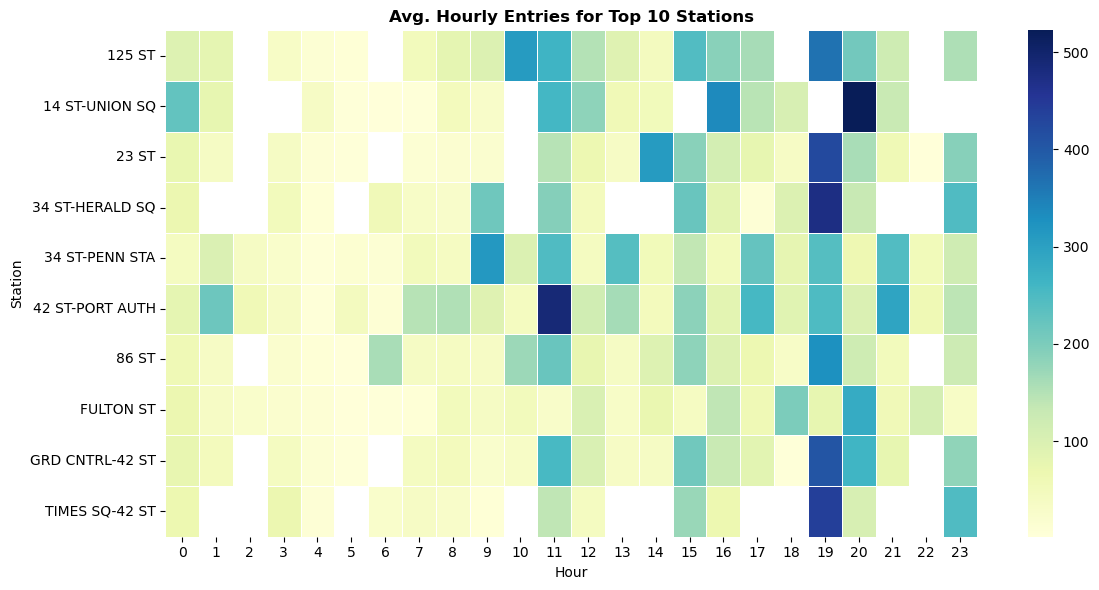

In [126]:
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour
top_stations = df.groupby('station')['FOUR_HOUR_ENTRIES'].sum().nlargest(10).index
heat_df = df[df['station'].isin(top_stations)]
heat_df = heat_df.groupby(['station', 'hour'])['FOUR_HOUR_ENTRIES'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heat_df, cmap="YlGnBu", linewidths=0.5)
plt.title("Avg. Hourly Entries for Top 10 Stations", weight='bold')
plt.xlabel("Hour")
plt.ylabel("Station")
plt.tight_layout()
plt.savefig("HourlyStationHeatmap.png", dpi=300)
plt.show()


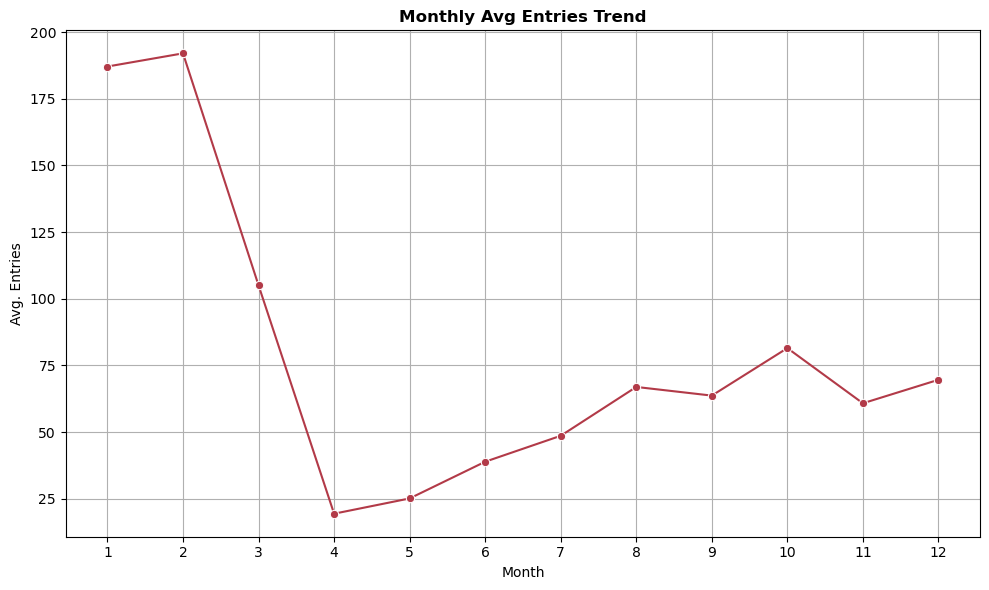

In [127]:
df['month'] = pd.to_datetime(df['date']).dt.month
monthly_avg = df.groupby('month')['FOUR_HOUR_ENTRIES'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='#b23a48')
plt.title("Monthly Avg Entries Trend", weight='bold')
plt.xlabel("Month")
plt.ylabel("Avg. Entries")
plt.xticks(range(1,13))
plt.grid(True)
plt.tight_layout()
plt.savefig("MonthlyTrend.png", dpi=300)
plt.show()


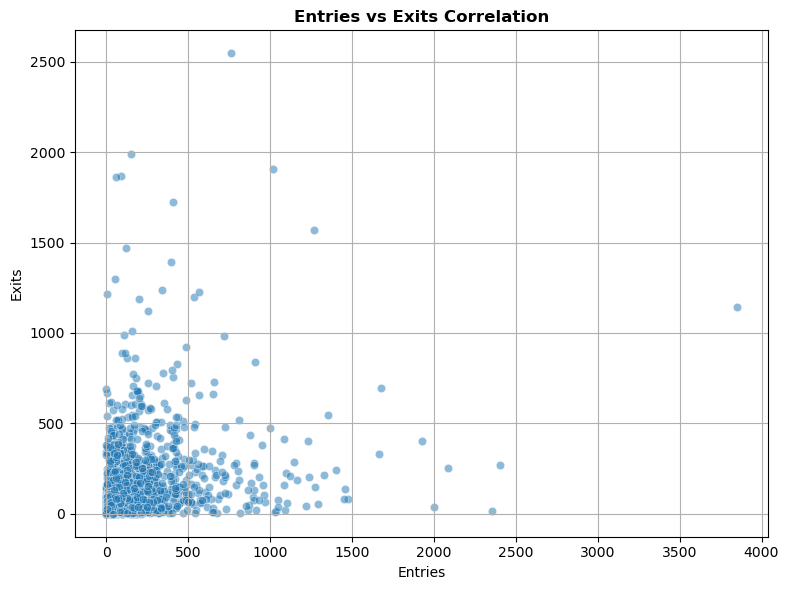

In [129]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="FOUR_HOUR_ENTRIES", y="FOUR_HOUR_EXITS", data=df.sample(5000), alpha=0.5)
plt.title("Entries vs Exits Correlation", weight='bold')
plt.xlabel("Entries")
plt.ylabel("Exits")
plt.grid(True)
plt.tight_layout()
plt.savefig("EntryExitCorrelation.png", dpi=300)
plt.show()
#Useful for quality checks or to identify entry-exit imbalances.

In [89]:
# Save the cleaned DataFrame
df.to_csv("MTA_Cleaned.csv", index=False)


# Part 2 Machine Learning Prediction of Historical data
##
## Technologies: Apache Spark, SparkML, PySpark-SQL

In [58]:
import os
import findspark
findspark.init()

# Need Py4JJava for SparkML hence Spark is made to use localhost
os.environ["SPARK_LOCAL_HOSTNAME"] = "localhost"

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("MTA Turnstile Spark ML") \
    .getOrCreate()

# Load cleaned CSV
mta_df = spark.read.csv("MTA_Cleaned.csv", header=True, inferSchema=True)

# Optional: Preview
mta_df.printSchema()
mta_df.show(5)


root
 |-- station: string (nullable = true)
 |-- turnstile: string (nullable = true)
 |-- date: date (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- nameofday: string (nullable = true)
 |-- entries: integer (nullable = true)
 |-- exits: integer (nullable = true)
 |-- FOUR_HOUR_ENTRIES: double (nullable = true)
 |-- FOUR_HOUR_EXITS: double (nullable = true)
 |-- FOOT_TRAFFIC: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- WEEKYEAR: integer (nullable = true)
 |-- WEEKDAY: integer (nullable = true)
 |-- HOLIDAY: string (nullable = true)
 |-- rank: double (nullable = true)

+---------------+-------------------+----------+-------------------+-------------------+---------+--------+--------+-----------------+------------------+------------+----+--------+--------+--------+-------+-------+---------+
|        station|          turnstile|      date| 

In [59]:
from pyspark.sql.functions import hour, col

# Extract hour from datetime
mta_df = mta_df.withColumn("hour", hour(col("datetime")))

# Select needed columns
mta_df = mta_df.select("station", "hour", "nameofday", "FOOT_TRAFFIC")
mta_df.show(5)


+---------------+----+---------+------------+
|        station|hour|nameofday|FOOT_TRAFFIC|
+---------------+----+---------+------------+
|  WTC-CORTLANDT|   0| Saturday|    239847.0|
|       GRAND ST|   0| Saturday|     22570.0|
|         103 ST|   1| Saturday|     14132.0|
|42 ST-PORT AUTH|   0| Saturday|     16930.0|
|         111 ST|   0| Saturday|     15729.0|
+---------------+----+---------+------------+
only showing top 5 rows



### Vector Assembly:

In [60]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Index categorical columns
station_indexer = StringIndexer(inputCol="station", outputCol="station_index")
day_indexer = StringIndexer(inputCol="nameofday", outputCol="day_index")

mta_df = station_indexer.fit(mta_df).transform(mta_df)
mta_df = day_indexer.fit(mta_df).transform(mta_df)

# Assemble features into single vector
assembler = VectorAssembler(
    inputCols=["station_index", "hour", "day_index"],
    outputCol="features"
)

mta_df = assembler.transform(mta_df)

# Final dataframe for ML
final_df = mta_df.select("features", "FOOT_TRAFFIC")
final_df.show(5)


+--------------+------------+
|      features|FOOT_TRAFFIC|
+--------------+------------+
|[59.0,0.0,5.0]|    239847.0|
|[89.0,0.0,5.0]|     22570.0|
|[66.0,1.0,5.0]|     14132.0|
|[13.0,0.0,5.0]|     16930.0|
|[80.0,0.0,5.0]|     15729.0|
+--------------+------------+
only showing top 5 rows



### Splitting Data into Training Data and Testing Data using randomSplit:

In [61]:
train_data, test_data = final_df.randomSplit([0.8, 0.2], seed=42)


### Linear Regression:

In [62]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="FOOT_TRAFFIC")
lr_model = lr.fit(train_data)

# Predict
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("features", "FOOT_TRAFFIC", "prediction").show(5)


+-------------+------------+------------------+
|     features|FOOT_TRAFFIC|        prediction|
+-------------+------------+------------------+
|    (3,[],[])|       317.0| 75504.03544255834|
|    (3,[],[])|       437.0| 75504.03544255834|
|[0.0,0.0,1.0]|       266.0|  94144.8459085515|
|[0.0,0.0,1.0]|       426.0|  94144.8459085515|
|[0.0,0.0,2.0]|       435.0|112785.65637454466|
+-------------+------------+------------------+
only showing top 5 rows



In [63]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="FOOT_TRAFFIC", predictionCol="prediction", metricName="rmse")
lr_rmse = evaluator.evaluate(lr_predictions)

print(f"Linear Regression RMSE: {lr_rmse}")


Linear Regression RMSE: 10425961.079124093


### Decision Tree:

In [64]:
from pyspark.ml.regression import DecisionTreeRegressor

dtr = DecisionTreeRegressor(
    featuresCol="features", 
    labelCol="FOOT_TRAFFIC",
    maxBins=512   # <-- Set a larger maxBins value
)

dtr_model = dtr.fit(train_data)

# Predict
dtr_predictions = dtr_model.transform(test_data)

# Evaluate
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="FOOT_TRAFFIC", predictionCol="prediction", metricName="rmse")
dtr_rmse = evaluator.evaluate(dtr_predictions)

print(f"Decision Tree Regression RMSE: {dtr_rmse}")


Decision Tree Regression RMSE: 10443518.266790537


In [65]:
from pyspark.sql.functions import when

# Classify traffic levels
classified_df = mta_df.withColumn(
    "traffic_level",
    when(col("FOOT_TRAFFIC") < 500, 0)
    .when((col("FOOT_TRAFFIC") >= 500) & (col("FOOT_TRAFFIC") < 1000), 1)
    .otherwise(2)
)


In [66]:
# Check label distribution
classified_df.groupBy("traffic_level").count().orderBy("traffic_level").show()


+-------------+-------+
|traffic_level|  count|
+-------------+-------+
|            0|7226950|
|            1| 382767|
|            2| 131403|
+-------------+-------+



In [67]:
from pyspark.sql.functions import when, col

# Reclassify into binary labels to balance classes
classified_df = classified_df.withColumn(
    "traffic_level",
    when(col("traffic_level") == 0, 0).otherwise(1)
)


In [68]:
classified_df.groupBy("traffic_level").count().orderBy("traffic_level").show()


+-------------+-------+
|traffic_level|  count|
+-------------+-------+
|            0|7226950|
|            1| 514170|
+-------------+-------+



In [69]:
assembler2 = VectorAssembler(
    inputCols=["station_index", "hour", "day_index"],
    outputCol="new_features"
)

classified_df = assembler2.transform(classified_df)

final_class_df = classified_df.select("new_features", "traffic_level")
final_class_df = final_class_df.withColumnRenamed("new_features", "features")  # Rename it back to "features" if needed

train_class_data, test_class_data = final_class_df.randomSplit([0.8, 0.2], seed=42)


### Random Forest Classification:

In [70]:
from pyspark.ml.classification import RandomForestClassifier

rfc = RandomForestClassifier(
    featuresCol="features", 
    labelCol="traffic_level", 
    numTrees=10,
    maxBins=512   # <-- very important
)
train_class_data.cache()
rfc_model = rfc.fit(train_class_data)

rfc_predictions = rfc_model.transform(test_class_data)
rfc_predictions.select("features", "traffic_level", "prediction").show(5)



+-------------+-------------+----------+
|     features|traffic_level|prediction|
+-------------+-------------+----------+
|    (3,[],[])|            0|       0.0|
|    (3,[],[])|            0|       0.0|
|[0.0,0.0,1.0]|            0|       0.0|
|[0.0,0.0,1.0]|            0|       0.0|
|[0.0,0.0,2.0]|            0|       0.0|
+-------------+-------------+----------+
only showing top 5 rows



In [71]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="traffic_level", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(rfc_predictions)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9336
